# Trends and variations of 500hpa geopotential height and JJA maximum daily temperature in reanalyses and CMIP6

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import proplot as pplot
import cmaps
from matplotlib.patches import Rectangle
import matplotlib as mpl
from cartopy.util import add_cyclic_point
from scipy.stats import pearsonr
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [2]:
target_griddes = {'lat': np.arange(0, 91, 3),'lon':np.arange(0, 359, 3)}
dataset_dir = {
    'CanESM5':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/cmip6_data/CanESM5/',
    'HadGEM3-GC31-LL':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/cmip6_data/HadGEM3-GC31-LL/',
    'IPSL-CM6A-LR':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/cmip6_data/IPSL-CM6A-LR/',
    'MIROC6':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/cmip6_data/MIROC6/',
    'MRI-ESM2-0':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/cmip6_data/MRI-ESM2-0/',
    'era5':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/era5_data/',
    'jra55':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/jra55_data/',
    'ncep2':'/Users/zeqinhuang/Documents/paper/HWdna/dataset/ncep_data/'
}
dataset_src_run = {
    'CanESM5':{
        'historical':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1','r8i1p1f1','r9i1p1f1','r10i1p1f1'],
    },
    'HadGEM3-GC31-LL':{
        'historical':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'hist-GHG':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'hist-nat':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'hist-aer':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
        'ssp585':['r1i1p1f3','r2i1p1f3','r3i1p1f3','r4i1p1f3'],
    },
    'MIROC6':{
        'historical':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r3i1p1f1'],
    },
    'IPSL-CM6A-LR':{
        'historical':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r4i1p1f1','r5i1p1f1','r6i1p1f1','r7i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r6i1p1f1','r14i1p1f1'],
    },
    'MRI-ESM2-0':{
        'historical':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'hist-GHG':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'hist-nat':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'hist-aer':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
        'ssp585':['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1'],
    },
}


In [3]:
def sel_domain(dataarray,lon_min,lon_max,lat_min,lat_max):
    mask_lon = (dataarray.lon >= lon_min) & (dataarray.lon <= lon_max)
    mask_lat = (dataarray.lat >= lat_min) & (dataarray.lat <= lat_max)
    dataarray = dataarray.where(mask_lon & mask_lat, drop=True)
    return dataarray

In [4]:
def get_file_path(var_name, dataset, forcing = None, ensmeble = None, trendOrSig = 'trend'):
    if var_name == 'zg' or var_name == 'hgt':
        if dataset not in ['era5','ncep2','jra55']:
            if dataset != 'HadGEM3-GC31-LL':
                path = dataset_dir[dataset] + var_name + '_day_' + dataset + '_' + forcing + '_' + ensmeble + '_gn_1979-01-01-2014-12-31_level50000_' + trendOrSig + '.nc'
            else:
                path = dataset_dir[dataset] + var_name + '_day_' + dataset + '_' + forcing + '_' + ensmeble + '_gn_1979-01-01-2014-12-30_level50000_' + trendOrSig + '.nc'
        else:
            path = dataset_dir[dataset] + var_name + '_' + dataset + '_1979-2014_' + trendOrSig + '.nc'
    elif var_name == 'tasmax' or var_name == 'mx2t' or var_name == 'maxTx':
        if dataset not in ['era5','ncep2','jra55']:
            if dataset != 'HadGEM3-GC31-LL':
                path = dataset_dir[dataset] + var_name + '_day_' + dataset + '_' + forcing + '_' + ensmeble + '_gn_1979-01-01-2014-12-31_'  + trendOrSig + '.nc'
            else:
                path = dataset_dir[dataset] + var_name + '_day_' + dataset + '_' + forcing + '_' + ensmeble + '_gn_1979-01-01-2014-12-30_'  + trendOrSig + '.nc'
        else:
            path = dataset_dir[dataset] + var_name + '_' + dataset + '_1979-2014_' + trendOrSig + '.nc'
    return path

In [5]:
def get_reanalysis_avg(var_name,trendOrSig = 'trend'):
    var_path_era5 = get_file_path(var_name = var_name, dataset = 'era5',trendOrSig = trendOrSig)
    var_path_ncep2 = get_file_path(var_name = var_name, dataset = 'ncep2',trendOrSig = trendOrSig)
    var_path_jra55 = get_file_path(var_name = var_name, dataset = 'jra55',trendOrSig = trendOrSig)
    var_era5 = xr.open_dataarray(var_path_era5)
    var_ncep2 = xr.open_dataarray(var_path_ncep2)
    var_jra55 = xr.open_dataarray(var_path_jra55)
    var_era5 = var_era5.rename({'longitude':'lon','latitude':'lat'})
    var_era5 = var_era5.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_ncep2 = var_ncep2.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_jra55 = var_jra55.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_era5 = var_era5.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
    var_ncep2 = var_ncep2.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
    var_jra55 = var_jra55.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
    var_avg = (var_era5 + var_ncep2 + var_jra55) / 3
    return var_avg

In [6]:
def get_reanalysis_sig(var_name): 
    '''
    decide the significance of the trends in reanalyses average, 
    only those grids with significant trends (p<0.05) in more than two of the three reanalyses are marked as significant
    '''
    var_path_era5 = get_file_path(var_name = var_name, dataset = 'era5',trendOrSig = 'sig')
    var_path_ncep2 = get_file_path(var_name = var_name, dataset = 'ncep2',trendOrSig = 'sig')
    var_path_jra55 = get_file_path(var_name = var_name, dataset = 'jra55',trendOrSig = 'sig')
    var_era5 = xr.open_dataarray(var_path_era5)
    var_ncep2 = xr.open_dataarray(var_path_ncep2)
    var_jra55 = xr.open_dataarray(var_path_jra55)
    var_era5 = var_era5.rename({'longitude':'lon','latitude':'lat'})
    var_era5 = var_era5.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_ncep2 = var_ncep2.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_jra55 = var_jra55.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
    var_era5 = var_era5.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
    var_ncep2 = var_ncep2.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
    var_jra55 = var_jra55.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')

    var_era5 = var_era5 < 0.05
    var_ncep2 = var_ncep2 < 0.05
    var_jra55 = var_jra55 < 0.05
    sig = (var_era5 * 1 + var_ncep2  * 1+ var_jra55 * 1) >= 2
    return sig

In [7]:
def get_cmip_avg(var_name,forcing,trendOrSig = 'trend'):
    var_da_ens = xr.DataArray(0)
    count = 0
    for d in dataset_src_run.keys():
        for e in dataset_src_run[d][forcing]:
            var_path = get_file_path(var_name=var_name, dataset=d, forcing=forcing, ensmeble=e, trendOrSig=trendOrSig)
            if var_name != 'tasmax':
                var_da = xr.open_dataarray(var_path)
            else:
                var_da = xr.open_dataset(var_path)
                var_da = var_da['tasmax']
                var_da = sel_domain(var_da,lon_min=0,lon_max=360,lat_min=0,lat_max=90)
            var_da = var_da.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
            var_da = var_da.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
            var_da = var_da.interpolate_na(dim='lat',method='linear',fill_value='extrapolate')
            var_da_ens = var_da_ens + var_da
            count += 1
    var_da_ens = var_da_ens / count
    return var_da_ens

In [8]:
def get_cmip_sig(var_name,forcing,trendOrSig = 'trend'):
    var_da_ens_mean = get_cmip_avg(var_name=var_name,forcing=forcing,trendOrSig=trendOrSig)
    var_da_ens_sig_pos = xr.DataArray(0)
    var_da_ens_sig_neg = xr.DataArray(0)
    count = 0
    for d in dataset_src_run.keys():
        for e in dataset_src_run[d][forcing]:
            var_path = get_file_path(var_name=var_name, dataset=d, forcing=forcing, ensmeble=e, trendOrSig=trendOrSig)
            if var_name != 'tasmax':
                var_da = xr.open_dataarray(var_path)
            else:
                var_da = xr.open_dataset(var_path)
                var_da = var_da['tasmax']
                var_da = sel_domain(var_da,lon_min=0,lon_max=360,lat_min=0,lat_max=90)
            var_da = var_da.interp(lat=target_griddes['lat'],lon=target_griddes['lon'],method='nearest')
            var_da = var_da.interpolate_na(dim='lon',method='linear',fill_value='extrapolate')
            var_da = var_da.interpolate_na(dim='lat',method='linear',fill_value='extrapolate')
            var_da_sig_pos = (var_da > 0) * (var_da_ens_mean > 0)
            var_da_sig_neg = (var_da < 0) * (var_da_ens_mean < 0)
            var_da_ens_sig_pos = var_da_ens_sig_pos + var_da_sig_pos * 1
            var_da_ens_sig_neg = var_da_ens_sig_neg + var_da_sig_neg * 1
            count += 1
    var_da_ens_sig_pos = var_da_ens_sig_pos > count * 0.8
    var_da_ens_sig_neg = var_da_ens_sig_neg > count * 0.8
    var_da_ens_sig = var_da_ens_sig_pos * 1 + var_da_ens_sig_neg * 1
    return var_da_ens_sig

In [9]:
def get_var_cal_ano(var_name,forcing,domain='NH'): ## var_name should be one of ['hgtmean','tmaxmax','tmaxmean']
    var_df_path = '/Users/zeqinhuang/Documents/paper/HWdna/procData/' + var_name + '_regional_variation_' + domain + '.csv'
    var_df = pd.read_csv(var_df_path, index_col=0)
    var_df = var_df.sort_index()
    del var_df['IPSL-CM6A-LR_ssp585_r3i1p1f1']
    del var_df['IPSL-CM6A-LR_ssp585_r14i1p1f1']
    var_ano_df = var_df.copy()
    for c in var_df.columns:
        if c in ['era5','ncep2','jra55']:
            var_ano_df[c] = var_df[c] - var_df[c].loc[1979:2014].mean()
        else:
            d = c.split('_')[0]
            f = c.split('_')[1]
            e = c.split('_')[2]
            if f != 'ssp585':
                var_ano_df[c] = var_df[c] - var_df[c].loc[1979:2014].mean()
            else:
                var_ano_df[c] = var_df[c] - var_df[d + '_historical_' + e].loc[1979:2014].mean()

    historical_dn = []
    hist_GHG_dn = []
    hist_aer_dn = []
    hist_nat_dn = []
    ssp585_dn = []
    for c in var_ano_df.columns:
        if 'historical' in c:
            historical_dn.append(c)
        elif 'hist-GHG' in c:
            hist_GHG_dn.append(c)
        elif 'hist-aer' in c:
            hist_aer_dn.append(c)
        elif 'hist-nat' in c:
            hist_nat_dn.append(c)
        elif 'ssp585' in c:
            ssp585_dn.append(c)
        else:
            pass

    if forcing == 'historical':
        var_ano_df = var_ano_df[historical_dn]
    elif forcing == 'hist-GHG':
        var_ano_df = var_ano_df[hist_GHG_dn]
    elif forcing == 'hist-aer':
        var_ano_df = var_ano_df[hist_aer_dn]
    elif forcing == 'hist-nat':
        var_ano_df = var_ano_df[hist_nat_dn]
    elif forcing == 'ssp585':
        var_ano_df = var_ano_df[ssp585_dn]
    else:
        var_ano_df = var_ano_df[forcing]
    return var_ano_df

In [10]:
def get_forcing_ens_mean(var_ano_df):
    var_historical_ano_mean = var_ano_df.mean(axis=1,skipna=True)
    return var_historical_ano_mean
            

In [11]:
def get_forcing_ens_envelope(var_ano_df,quantile):
    var_historical_ano_quantile = var_ano_df.quantile(quantile,axis=1,numeric_only=True)
    return var_historical_ano_quantile

In [12]:
from scipy.stats import linregress
def _compute_slope(var):
    slp = linregress(range(len(var)),var).slope
    return slp

def _compute_sig(var):
    sig = linregress(range(len(var)),var).pvalue
    return sig

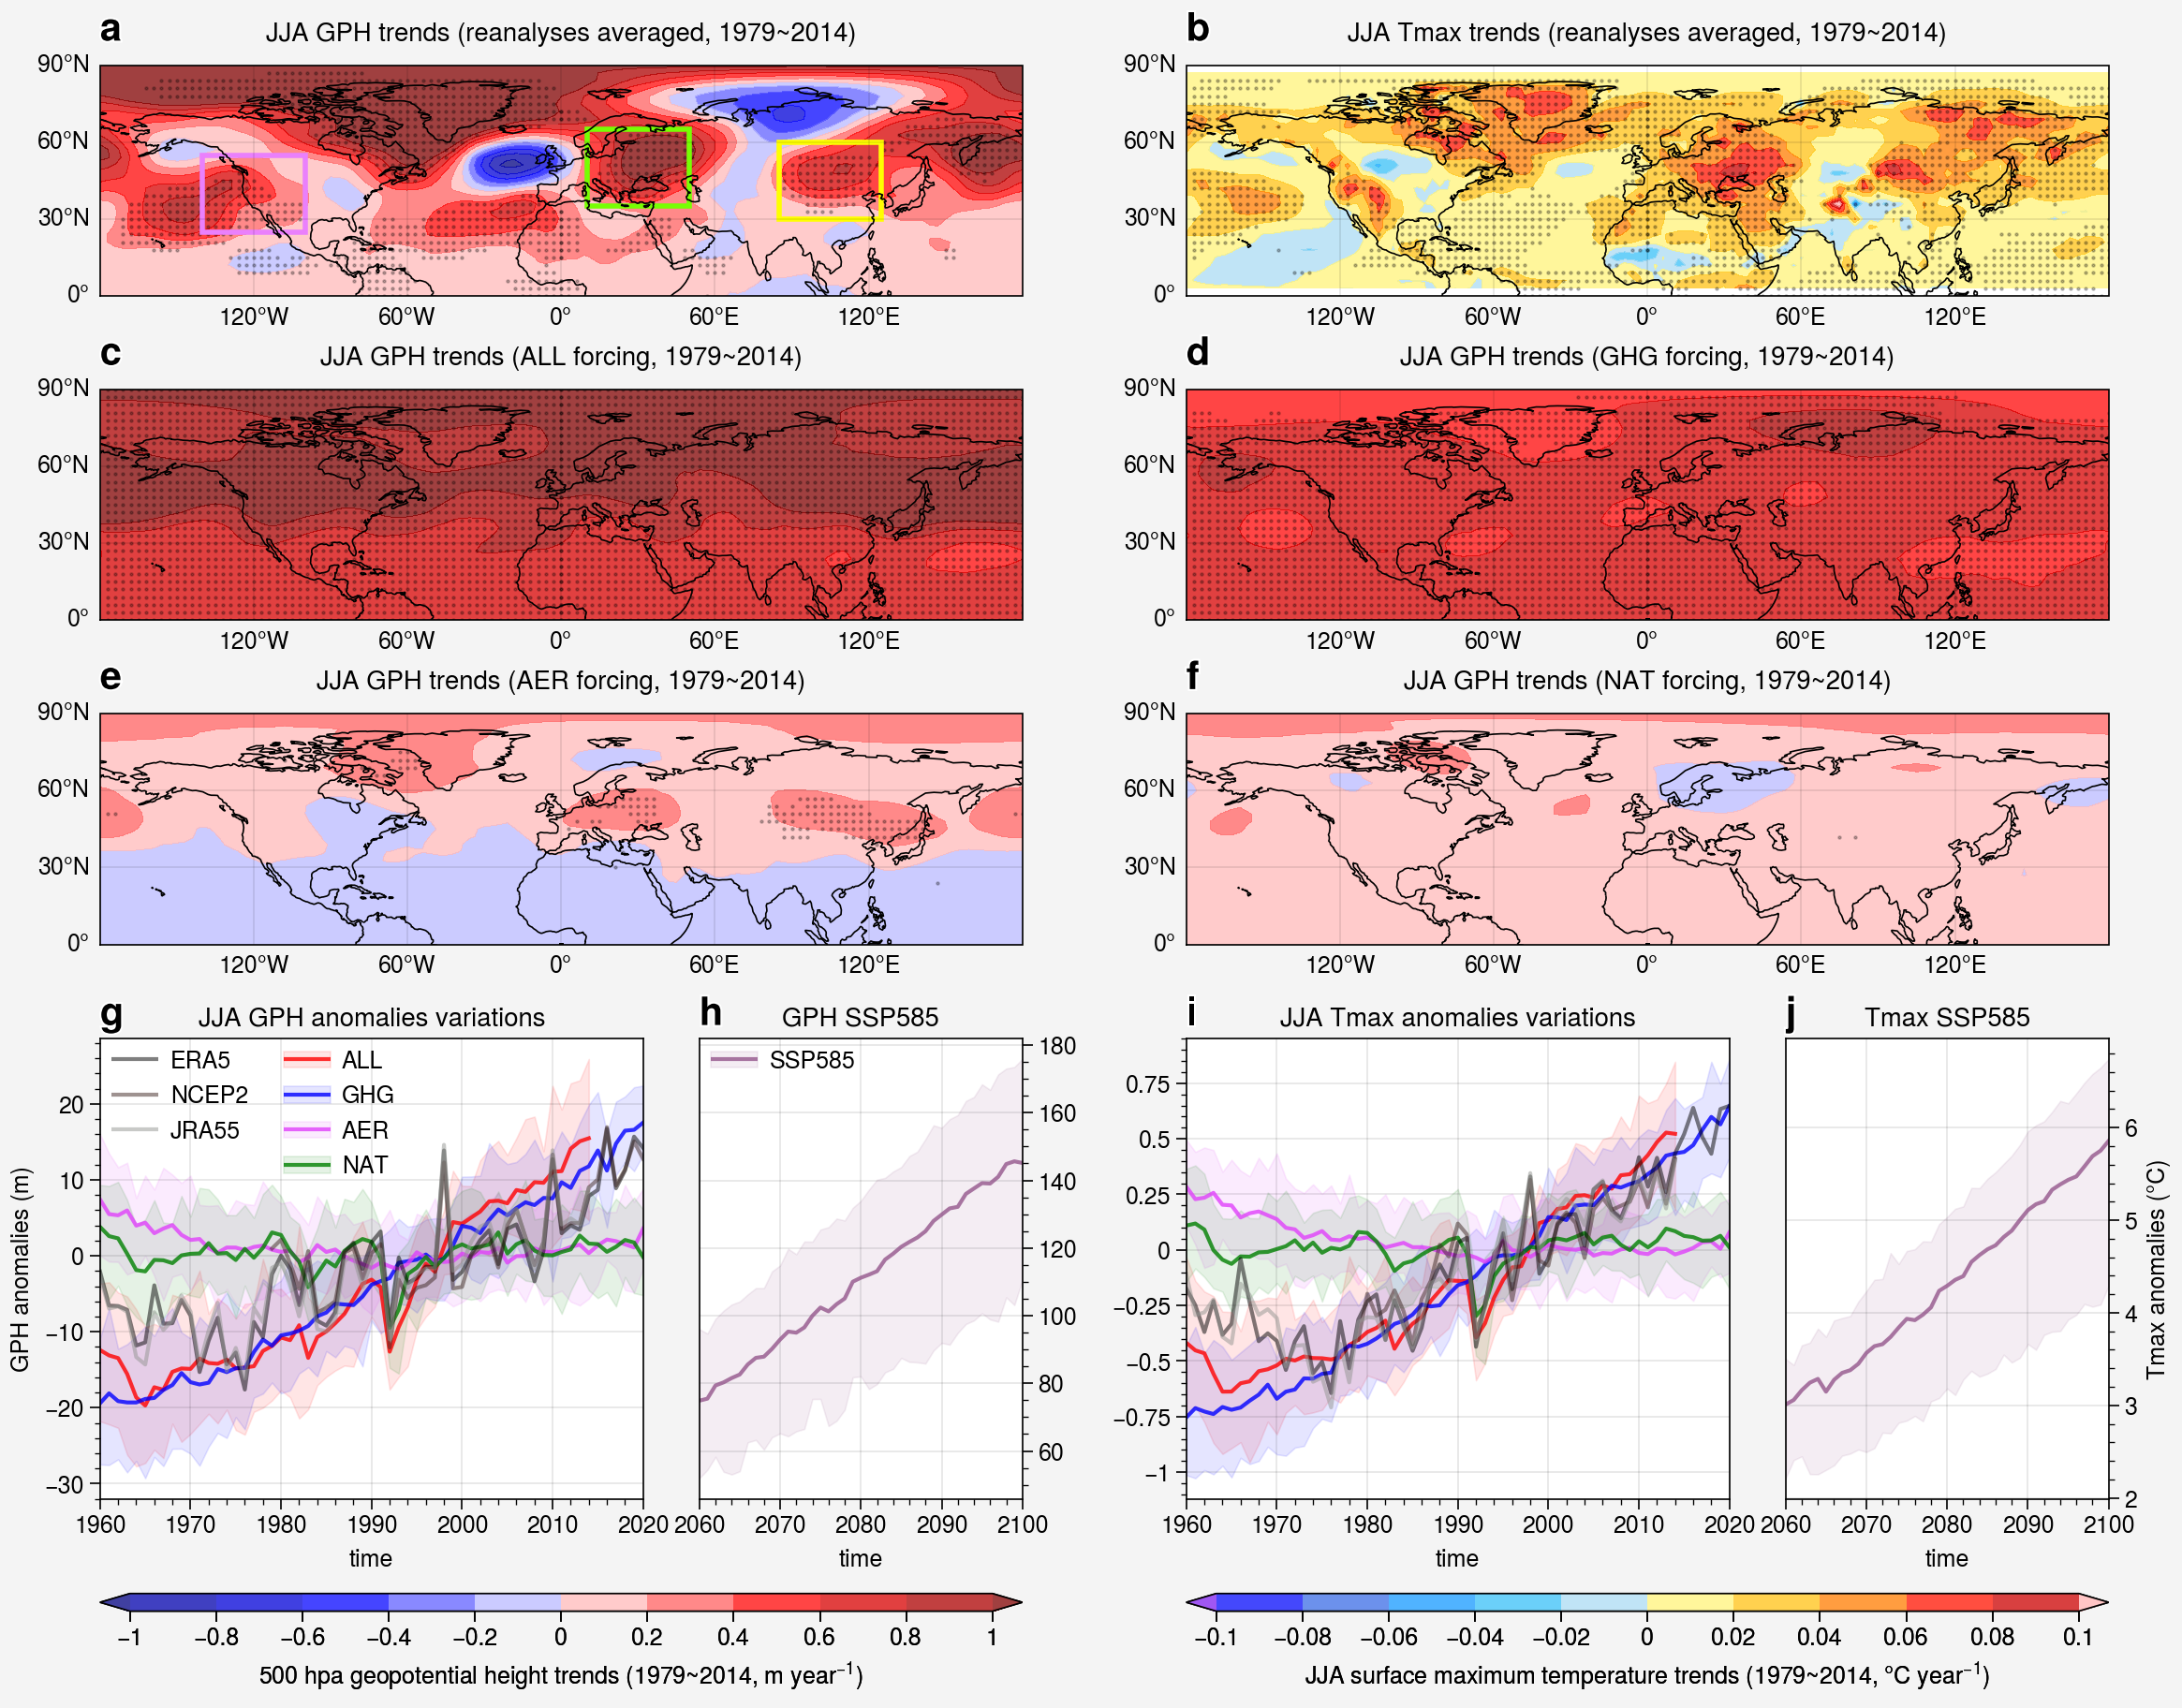

In [363]:
array = [
    [1,1,1,1,1,2,2,2,2,2],
    [3,3,3,3,3,4,4,4,4,4],
    [5,5,5,5,5,6,6,6,6,6],
    [7,7,7,8,8,9,9,9,10,10],
    [7,7,7,8,8,9,9,9,10,10]
]
fig, axs = pplot.subplots(array,wspace=(5,5,2.4,5,7,5,5,2.4,5),hspace=(4,4,4,0),proj={1:'pcarree',2:'pcarree',3:'pcarree',4:'pcarree',5:'pcarree',6:'pcarree'},width = 16,share=False)
levels_hgt = [i for i in np.linspace(-1,1,11)]
levels_tmax = [i for i in np.linspace(-0.1,0.1,11)]
cmap1 = cmaps.BlRe
cmap2=cmaps.ncl_default

for i in range(2):
    if i == 0:
        var_name = 'hgt'
    elif i == 1:
        var_name = 'mx2t'
    reanalysis_avg = get_reanalysis_avg(var_name,trendOrSig='trend')
    lon = reanalysis_avg.coords['lon']
    lon_idx = reanalysis_avg.dims.index('lon')
    lats1d = reanalysis_avg['lat']
    reanalysis_avg, lons1d = add_cyclic_point(reanalysis_avg, coord=lon,axis=lon_idx)
    reanalysis_sig = get_reanalysis_sig(var_name)
    lon = reanalysis_sig.coords['lon']
    lats1d = reanalysis_sig['lat']
    reanalysis_sig, lons1d = add_cyclic_point(reanalysis_sig, coord=lon,axis=lon_idx)

    X2,Y2 = np.meshgrid(lons1d,lats1d)
    X2 = X2[reanalysis_sig]
    Y2 = Y2[reanalysis_sig]
    
    if i == 0:
        level = levels_hgt
    else:
        level = levels_tmax
    if i == 0:
        p1 = axs[i].contourf(lons1d,lats1d,reanalysis_avg,levels = level, alpha=0.75,extend = 'both',cmap=cmap1)
    else:
        p2 = axs[i].contourf(lons1d,lats1d,reanalysis_avg,levels = level, alpha=0.75,extend = 'both',cmap=cmap2)
    axs[i].format(coast=True, lonlim=(-180,180), latlim=(0,90),labels=True, lonlines=60, latlines=30)
    axs[i].scatter(X2,Y2,s=1,c='black',alpha=0.25)
    if i == 0:
        axs[i].add_patch(Rectangle((85,30),width=40,height=30,fc='none',color='#FFFF00',linewidth=2))
        axs[i].add_patch(Rectangle((10,35),width=40,height=30,fc='none',color='#76FF03',linewidth=2))
        axs[i].add_patch(Rectangle((-140,25),width=40,height=30,fc='none',color='#EA80FC',linewidth=2))

for i in range(2,6):
    if i == 2:
        var_name = 'zg'
        forcing = 'historical'
        trendOrSig = 'trend'
    elif i == 3:
        var_name = 'zg'
        forcing = 'hist-GHG'
        trendOrSig = 'trend'
    elif i == 4:
        var_name = 'zg'
        forcing = 'hist-aer'
        trendOrSig = 'trend'
    else:
        var_name = 'zg'
        forcing = 'hist-nat'
        trendOrSig = 'trend'

    cmip_avg = get_cmip_avg(var_name=var_name,forcing =forcing,trendOrSig=trendOrSig)
    lon = cmip_avg.coords['lon']
    lon_idx = cmip_avg.dims.index('lon')
    cmip_avg, lons1d = add_cyclic_point(cmip_avg, coord=lon,axis=lon_idx)
    cmip_sig = get_cmip_sig(var_name=var_name,forcing =forcing,trendOrSig=trendOrSig)
    lon = cmip_sig.coords['lon']
    lon_idx = cmip_sig.dims.index('lon')
    cmip_sig, lons1d = add_cyclic_point(cmip_sig, coord=lon,axis=lon_idx)

    X2,Y2 = np.meshgrid(lons1d,lats1d)
    X2 = X2 * cmip_sig
    Y2 = Y2 * cmip_sig
    
    level = levels_hgt
    axs[i].contourf(lons1d,lats1d,cmip_avg,levels = level, alpha=0.75,extend = 'both',cmap=cmap1)
    axs[i].format(coast=True, lonlim=(-180,180), latlim=(0,90),labels=True, lonlines=60, latlines=30)
    axs[i].scatter(X2,Y2,s=1,c='black',alpha=0.25)

var_df_historical_hgt = get_var_cal_ano(var_name='hgtmean',forcing='historical',domain='NH').loc[1960:]
var_df_historical_005_hgt = get_forcing_ens_envelope(var_df_historical_hgt,quantile=0.05)
var_df_historical_095_hgt = get_forcing_ens_envelope(var_df_historical_hgt,quantile=0.95)
var_ens_df_historical_hgt = get_forcing_ens_mean(var_df_historical_hgt)
var_df_GHG_hgt = get_var_cal_ano(var_name='hgtmean',forcing='hist-GHG',domain='NH').loc[1960:]
var_df_GHG_005_hgt = get_forcing_ens_envelope(var_df_GHG_hgt,quantile=0.05)
var_df_GHG_095_hgt = get_forcing_ens_envelope(var_df_GHG_hgt,quantile=0.95)
var_ens_df_GHG_hgt = get_forcing_ens_mean(var_df_GHG_hgt)
var_df_aer_hgt = get_var_cal_ano(var_name='hgtmean',forcing='hist-aer',domain='NH').loc[1960:]
var_df_aer_005_hgt = get_forcing_ens_envelope(var_df_aer_hgt,quantile=0.05)
var_df_aer_095_hgt = get_forcing_ens_envelope(var_df_aer_hgt,quantile=0.95)
var_ens_df_aer_hgt = get_forcing_ens_mean(var_df_aer_hgt)
var_df_nat_hgt = get_var_cal_ano(var_name='hgtmean',forcing='hist-nat',domain='NH').loc[1960:]
var_df_nat_005_hgt = get_forcing_ens_envelope(var_df_nat_hgt,quantile=0.05)
var_df_nat_095_hgt = get_forcing_ens_envelope(var_df_nat_hgt,quantile=0.95)
var_ens_df_nat_hgt = get_forcing_ens_mean(var_df_nat_hgt)
var_df_ssp585_hgt = get_var_cal_ano(var_name='hgtmean',forcing='ssp585',domain='NH').loc[2060:]
var_df_ssp585_005_hgt = get_forcing_ens_envelope(var_df_ssp585_hgt,quantile=0.05)
var_df_ssp585_095_hgt = get_forcing_ens_envelope(var_df_ssp585_hgt,quantile=0.95)
var_ens_df_ssp585_hgt = get_forcing_ens_mean(var_df_ssp585_hgt)

var_df_era5_hgt = get_var_cal_ano(var_name = 'hgtmean',forcing = 'era5').loc[1960:]
var_df_ncep2_hgt = get_var_cal_ano(var_name = 'hgtmean',forcing = 'ncep2').loc[1979:]
var_df_jra55_hgt = get_var_cal_ano(var_name = 'hgtmean',forcing = 'jra55').loc[1960:]

l1_hist = axs[6].fill_between(var_df_historical_hgt.index,var_df_historical_005_hgt,var_df_historical_095_hgt,color='red',alpha=0.1)
l1_ghg = axs[6].fill_between(var_df_GHG_hgt.index,var_df_GHG_005_hgt,var_df_GHG_095_hgt,color='blue',alpha=0.1)
l1_aer = axs[6].fill_between(var_df_aer_hgt.index,var_df_aer_005_hgt,var_df_aer_095_hgt,color='#E040FB',alpha=0.1)
l1_nat = axs[6].fill_between(var_df_nat_hgt.index,var_df_nat_005_hgt,var_df_nat_095_hgt,color='green',alpha=0.1)
l1_ssp585 = axs[7].fill_between(var_df_ssp585_hgt.index,var_df_ssp585_005_hgt,var_df_ssp585_095_hgt,color='purple',alpha=0.1)

l2_hist = axs[6].plot(var_df_historical_hgt.index,var_ens_df_historical_hgt,color='red',alpha=0.8)
l2_ghg = axs[6].plot(var_df_GHG_hgt.index,var_ens_df_GHG_hgt,color='blue',alpha=0.8)
l2_aer = axs[6].plot(var_df_aer_hgt.index,var_ens_df_aer_hgt,color='#E040FB',alpha=0.8)
l2_nat = axs[6].plot(var_df_nat_hgt.index,var_ens_df_nat_hgt,color='green',alpha=0.8)
l2_era5 = axs[6].plot(var_df_era5_hgt.index,var_df_era5_hgt,color='black',alpha=0.5)
l2_ncep2 = axs[6].plot(var_df_ncep2_hgt.index,var_df_ncep2_hgt,color='#3E2723',alpha=0.5)
l2_jra55 = axs[6].plot(var_df_jra55_hgt.index,var_df_jra55_hgt,color='gray',alpha=0.5)
l2_white = axs[6].plot(var_df_jra55_hgt.index,var_df_jra55_hgt,color='white',alpha=0.001)
axs[6].set_ylabel('GPH anomalies (m)')
axs[6].set_xlim([1960,2020])
l2_ssp585 = axs[7].plot(var_df_ssp585_hgt.index,var_ens_df_ssp585_hgt,color='purple',alpha=0.8)
axs[7].yaxis.tick_right()
axs[7].yaxis.label.set_visible(False)

var_df_historical_tmax = get_var_cal_ano(var_name='tmaxmean',forcing='historical',domain='NH').loc[1960:]
var_df_historical_005_tmax = get_forcing_ens_envelope(var_df_historical_tmax,quantile=0.05)
var_df_historical_095_tmax = get_forcing_ens_envelope(var_df_historical_tmax,quantile=0.95)
var_ens_df_historical_tmax = get_forcing_ens_mean(var_df_historical_tmax)
var_df_GHG_tmax = get_var_cal_ano(var_name='tmaxmean',forcing='hist-GHG',domain='NH').loc[1960:]
var_df_GHG_005_tmax = get_forcing_ens_envelope(var_df_GHG_tmax,quantile=0.05)
var_df_GHG_095_tmax = get_forcing_ens_envelope(var_df_GHG_tmax,quantile=0.95)
var_ens_df_GHG_tmax = get_forcing_ens_mean(var_df_GHG_tmax)
var_df_aer_tmax = get_var_cal_ano(var_name='tmaxmean',forcing='hist-aer',domain='NH').loc[1960:]
var_df_aer_005_tmax = get_forcing_ens_envelope(var_df_aer_tmax,quantile=0.05)
var_df_aer_095_tmax = get_forcing_ens_envelope(var_df_aer_tmax,quantile=0.95)
var_ens_df_aer_tmax = get_forcing_ens_mean(var_df_aer_tmax)
var_df_nat_tmax = get_var_cal_ano(var_name='tmaxmean',forcing='hist-nat',domain='NH').loc[1960:]
var_df_nat_005_tmax = get_forcing_ens_envelope(var_df_nat_tmax,quantile=0.05)
var_df_nat_095_tmax = get_forcing_ens_envelope(var_df_nat_tmax,quantile=0.95)
var_ens_df_nat_tmax = get_forcing_ens_mean(var_df_nat_tmax)
var_df_ssp585_tmax = get_var_cal_ano(var_name='tmaxmean',forcing='ssp585',domain='NH').loc[2060:]
var_df_ssp585_005_tmax = get_forcing_ens_envelope(var_df_ssp585_tmax,quantile=0.05)
var_df_ssp585_095_tmax = get_forcing_ens_envelope(var_df_ssp585_tmax,quantile=0.95)
var_ens_df_ssp585_tmax = get_forcing_ens_mean(var_df_ssp585_tmax)
var_df_era5_tmax = get_var_cal_ano(var_name = 'tmaxmean',forcing = 'era5').loc[1960:]
var_df_ncep2_tmax = get_var_cal_ano(var_name = 'tmaxmean',forcing = 'ncep2').loc[1979:]
var_df_jra55_tmax = get_var_cal_ano(var_name = 'tmaxmean',forcing = 'jra55').loc[1960:]
axs[8].fill_between(var_df_historical_tmax.index,var_df_historical_005_tmax,var_df_historical_095_tmax,color='red',alpha=0.1)
axs[8].fill_between(var_df_GHG_tmax.index,var_df_GHG_005_tmax,var_df_GHG_095_tmax,color='blue',alpha=0.1)
axs[8].fill_between(var_df_aer_tmax.index,var_df_aer_005_tmax,var_df_aer_095_tmax,color='#E040FB',alpha=0.1)
axs[8].fill_between(var_df_nat_tmax.index,var_df_nat_005_tmax,var_df_nat_095_tmax,color='green',alpha=0.1)
axs[9].fill_between(var_df_ssp585_tmax.index,var_df_ssp585_005_tmax,var_df_ssp585_095_tmax,color='purple',alpha=0.1)
axs[9].yaxis.tick_right()

axs[8].plot(var_df_historical_tmax.index,var_ens_df_historical_tmax,color='red',alpha=0.8)
axs[8].plot(var_df_GHG_tmax.index,var_ens_df_GHG_tmax,color='blue',alpha=0.8)
axs[8].plot(var_df_aer_tmax.index,var_ens_df_aer_tmax,color='#E040FB',alpha=0.8)
axs[8].plot(var_df_nat_tmax.index,var_ens_df_nat_tmax,color='green',alpha=0.8)
axs[8].plot(var_df_era5_tmax.index,var_df_era5_tmax,color='black',alpha=0.5)
axs[8].plot(var_df_ncep2_tmax.index,var_df_ncep2_tmax,color='#3E2723',alpha=0.5)
axs[8].plot(var_df_jra55_tmax.index,var_df_jra55_tmax,color='gray',alpha=0.5)
axs[9].plot(var_df_ssp585_tmax.index,var_ens_df_ssp585_tmax,color='purple',alpha=0.8)
axs[9].set_ylabel('Tmax anomalies (°C)')
axs[9].yaxis.set_label_position("right")
axs[8].set_xlim([1960,2020])
axs[8].yaxis.label.set_visible(False)

axs.format(abc = 'a', abcloc='ul', abcsize=15)
axs[0].format(abcloc='l',titleloc='c',title='JJA GPH trends (reanalyses averaged, 1979~2014)')
axs[1].format(abcloc='l',titleloc='c',title='JJA Tmax trends (reanalyses averaged, 1979~2014)')
axs[2].format(abcloc='l',titleloc='c',title='JJA GPH trends (ALL forcing, 1979~2014)')
axs[3].format(abcloc='l',titleloc='c',title='JJA GPH trends (GHG forcing, 1979~2014)')
axs[4].format(abcloc='l',titleloc='c',title='JJA GPH trends (AER forcing, 1979~2014)')
axs[5].format(abcloc='l',titleloc='c',title='JJA GPH trends (NAT forcing, 1979~2014)')
axs[6].format(abcloc='l',titleloc='c',title='JJA GPH anomalies variations')
axs[8].format(abcloc='l',titleloc='c',title='JJA Tmax anomalies variations')
axs[7].format(abcloc='l',titleloc='c',title='GPH SSP585')
axs[9].format(abcloc='l',titleloc='c',title='Tmax SSP585')
fig.colorbar(p1,loc='b',width='0.75em',col=(1,5),length=1,label='500 hpa geopotential height trends (1979~2014, m $year^{-1}$)')
fig.colorbar(p2,loc='b',width='0.75em',col=(6,10),length=1,label='JJA surface maximum temperature trends (1979~2014, °C $year^{-1}$)') 

axs[6].legend([l2_era5[0],(l1_hist,l2_hist[0]),l2_ncep2[0],(l1_ghg,l2_ghg[0]),l2_jra55[0],(l1_aer,l2_aer[0]),l2_white[0],(l1_nat,l2_nat[0])], ['ERA5','ALL','NCEP2','GHG','JRA55','AER','','NAT'],ncol=2,fontsize=10,frameon=False)
axs[7].legend([(l1_ssp585,l2_ssp585[0])], ['SSP585'],ncol=2,fontsize=10,frameon=False,loc='upper left')
fig_dir = '/Users/zeqinhuang/Documents/paper/HWdna/figure_res/'
fig.save(fig_dir + 'Fig1_changes_in_GPH_and_associated_hot_extreme.pdf')

In [13]:
var_df_era5_hgt = get_var_cal_ano(var_name = 'hgtmean',forcing = 'era5').loc[1979:2014]
var_df_jra55_hgt = get_var_cal_ano(var_name = 'hgtmean',forcing = 'jra55').loc[1979:2014]
var_df_ncep2_hgt = get_var_cal_ano(var_name = 'hgtmean',forcing = 'ncep2').loc[1979:2014]
var_df_historical_hgt = get_var_cal_ano(var_name='hgtmean',forcing='historical',domain='NH').loc[1979:2014]
var_df_GHG_hgt = get_var_cal_ano(var_name='hgtmean',forcing='hist-GHG',domain='NH').loc[1979:2014]
var_df_aer_hgt = get_var_cal_ano(var_name='hgtmean',forcing='hist-aer',domain='NH').loc[1979:2014]
var_df_nat_hgt = get_var_cal_ano(var_name='hgtmean',forcing='hist-nat',domain='NH').loc[1979:2014]

print('era5: ' + str(_compute_slope(var=var_df_era5_hgt)))
print('jra55: ' + str(_compute_slope(var=var_df_jra55_hgt)))
print('ncep2: ' + str(_compute_slope(var=var_df_ncep2_hgt)))
print('historical: ' + str(_compute_slope(var=var_df_historical_hgt.median(axis=1))))
print('hist-GHG: ' + str(_compute_slope(var=var_df_GHG_hgt.median(axis=1))))
print('hist-aer: ' + str(_compute_slope(var=var_df_aer_hgt.median(axis=1))))
print('hist-nat: ' + str(_compute_slope(var=var_df_nat_hgt.median(axis=1))))

era5: 0.26672294723294765
jra55: 0.36882403030831995
ncep2: 0.2559564092664068
historical: 0.8168246701017107
hist-GHG: 0.6630538954816395
hist-aer: 0.03375284709767036
hist-nat: 0.06263141635937243


In [14]:
var_df_era5_hgt = get_var_cal_ano(var_name = 'hgtmean',forcing = 'era5').loc[1979:2014]
var_df_jra55_hgt = get_var_cal_ano(var_name = 'hgtmean',forcing = 'jra55').loc[1979:2014]
var_df_ncep2_hgt = get_var_cal_ano(var_name = 'hgtmean',forcing = 'ncep2').loc[1979:2014]
var_df_historical_hgt = get_var_cal_ano(var_name='hgtmean',forcing='historical',domain='NH').loc[1979:2014]
var_df_GHG_hgt = get_var_cal_ano(var_name='hgtmean',forcing='hist-GHG',domain='NH').loc[1979:2014]
var_df_aer_hgt = get_var_cal_ano(var_name='hgtmean',forcing='hist-aer',domain='NH').loc[1979:2014]
var_df_nat_hgt = get_var_cal_ano(var_name='hgtmean',forcing='hist-nat',domain='NH').loc[1979:2014]

In [29]:
var_df_GHG_hgt.apply(_compute_slope,axis=0).min()

0.28169777489013986

In [29]:
get_var_cal_ano(var_name='hgtmean',forcing='ssp585',domain='NH').loc[2100].mean()

145.15096763316376

In [30]:
get_var_cal_ano(var_name='tmaxmean',forcing='ssp585',domain='NH').loc[2100].mean()

5.857740164636757

In [19]:
var_df_era5_tmax = get_var_cal_ano(var_name = 'tmaxmean',forcing = 'era5').loc[1979:2014]
var_df_jra55_tmax = get_var_cal_ano(var_name = 'tmaxmean',forcing = 'jra55').loc[1979:2014]
var_df_ncep2_tmax = get_var_cal_ano(var_name = 'tmaxmean',forcing = 'ncep2').loc[1979:2014]
var_df_historical_tmax = get_var_cal_ano(var_name='tmaxmean',forcing='historical',domain='NH').loc[1979:2014]
var_df_GHG_tmax = get_var_cal_ano(var_name='tmaxmean',forcing='hist-GHG',domain='NH').loc[1979:2014]
var_df_aer_tmax = get_var_cal_ano(var_name='tmaxmean',forcing='hist-aer',domain='NH').loc[1979:2014]
var_df_nat_tmax = get_var_cal_ano(var_name='tmaxmean',forcing='hist-nat',domain='NH').loc[1979:2014]

print('era5: ' + str(_compute_slope(var=var_df_era5_tmax)))
print('jra55: ' + str(_compute_slope(var=var_df_jra55_tmax)))
print('ncep2: ' + str(_compute_slope(var=var_df_ncep2_tmax)))
print('historical: ' + str(_compute_slope(var=var_df_historical_tmax.mean(axis=1))))
print('hist-GHG: ' + str(_compute_slope(var=var_df_GHG_tmax.mean(axis=1))))
print('hist-aer: ' + str(_compute_slope(var=var_df_aer_tmax.mean(axis=1))))
print('hist-nat: ' + str(_compute_slope(var=var_df_nat_tmax.mean(axis=1))))

era5: 0.02124606692406724
jra55: 0.021289683577863577
ncep2: 0.018237191763191468
historical: 0.02822969747242133
hist-GHG: 0.025136808033645916
hist-aer: -0.0009266025854935516
hist-nat: 0.002402106554513764
